In [1]:
import seaborn as sns
import numpy as np
import pandas as pd

In [21]:
# plot all x in the plane such that t = x^T theta
slices = {'x':np.array([]), 'y':np.array([]), 't': [], 'angle': []}
unit_sphere = np.array([[1., 1.], [1., -1.], [0.5, 0.75], [0.5, -0.75], [0.6, 0.2], [0.2, -0.6], [0.1, 0.7], [0.1, -0.7]])
for t in np.linspace(-1, 1, 5):
  for theta in unit_sphere:
    theta = theta / np.linalg.norm(theta)
    x = np.linspace(-1, 1, 100)
    y = (t - x * theta[0]) / theta[1] 
    slices['x'] = np.append(slices['x'], x)
    slices['y'] = np.append(slices['y'], y)
    slices['t'] += [round(t, 1)] * len(x)
    angle = round(-np.arctan2(theta[1], theta[0]) * 180 / np.pi)
    slices['angle'] += [angle] * len(x)
slices = pd.DataFrame(slices)
slices

,x,y,t,angle
0,-1.000000,-0.414214,-1.0,-45
1,-0.979798,-0.434416,-1.0,-45
2,-0.959596,-0.454618,-1.0,-45
3,-0.939394,-0.474820,-1.0,-45
4,-0.919192,-0.495022,-1.0,-45
...,...,...,...,...
3995,0.919192,-0.878839,1.0,82
3996,0.939394,-0.875953,1.0,82
3997,0.959596,-0.873067,1.0,82
3998,0.979798,-0.870181,1.0,82


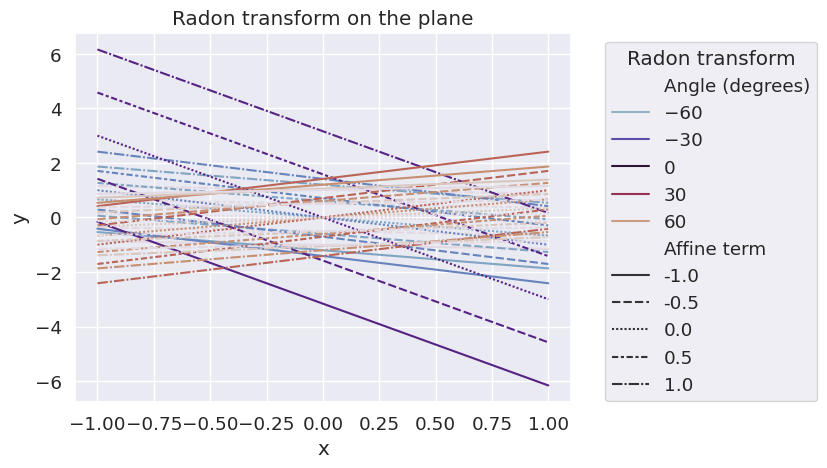

In [22]:
import matplotlib.pyplot as plt
sns.set(context='paper')
sns.set(font_scale=1.2)
angle = 'Angle (degrees)'
t = 'Affine term'
slices_renamed = slices.rename(columns={'angle': angle, 't': t})
sns.lineplot(data=slices_renamed, x='x', y='y', hue=angle, palette='twilight', style=t, legend='brief')
plt.legend(title='Radon transform', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Radon transform on the plane')
plt.savefig('radon.png', dpi=300, bbox_inches='tight')

In [38]:
slices = {'x':np.array([]), 'y':np.array([]), 'angle': []}
angles = np.linspace(0, 180, 16, endpoint=False)
unit_sphere = np.array([[np.cos(angle * np.pi / 180), np.sin(angle * np.pi / 180)] for angle in angles])
for angle, theta in zip(angles, unit_sphere):
  theta = theta / np.linalg.norm(theta)
  x = np.linspace(-1, 1, 100)
  if theta[1] == 0:
    theta[1] = 1e-6
  y = - x * (theta[0] / theta[1]) 
  slices['x'] = np.append(slices['x'], x)
  slices['y'] = np.append(slices['y'], y)
  angle = round(-np.arctan2(theta[1], theta[0]) * 180 / np.pi)
  slices['angle'] += [-angle] * len(x)
slices = pd.DataFrame(slices)
slices

,x,y,angle
0,-1.000000,1000000.000000,0
1,-0.979798,979797.979798,0
2,-0.959596,959595.959596,0
3,-0.939394,939393.939394,0
4,-0.919192,919191.919192,0
...,...,...,...
1595,0.919192,4.621090,169
1596,0.939394,4.722652,169
1597,0.959596,4.824215,169
1598,0.979798,4.925777,169


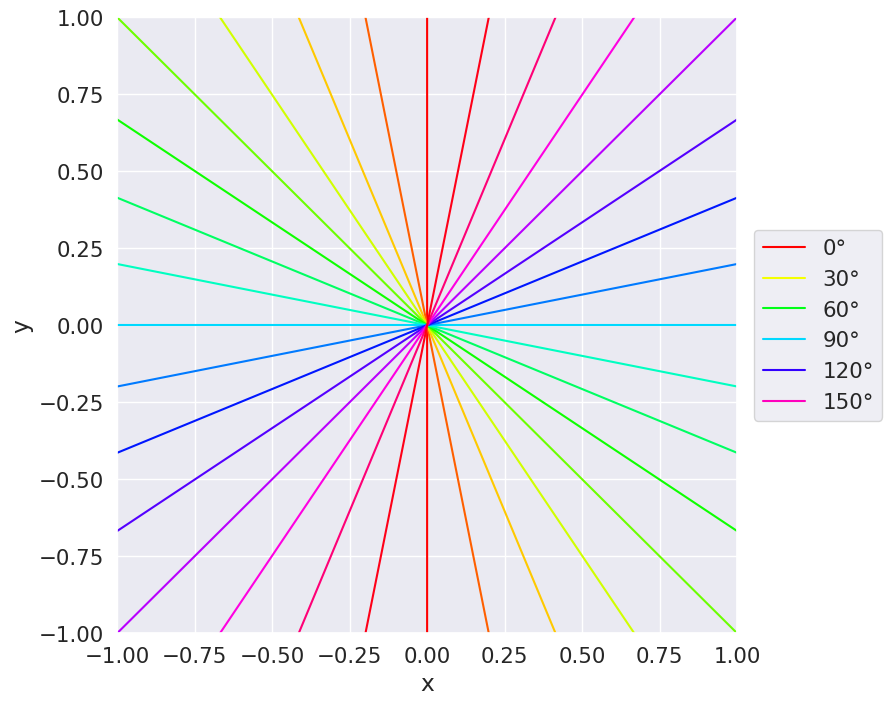

In [39]:
import matplotlib.pyplot as plt
sns.set(context='paper')
sns.set(font_scale=1.4)
plt.figure(figsize=(8, 8))
angle = 'Angle (degrees)'
slices_no_affine = slices.rename(columns={'angle': angle})
sns.lineplot(data=slices_no_affine, x='x', y='y', hue=angle, palette='hsv', legend='brief')
plt.legend(title='', bbox_to_anchor=(1.01, 0.5), loc='center left')
# add degree unit to legend
handles, labels = plt.gca().get_legend_handles_labels()
labels = [f'{label}°' for label in labels]
plt.legend(handles=handles, labels=labels, title='', bbox_to_anchor=(1.01, 0.5), loc='center left')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.savefig('radon.png', dpi=300, bbox_inches='tight')

In [8]:
slices_no_affine

,x,y,Angle (degrees)


(array([ 1.,  2.,  5.,  1.,  8.,  4.,  8.,  5.,  9.,  9., 15.,  7.,  7.,
         5.,  7.,  1.,  3.,  0.,  2.,  1.]),
 array([2.9163026 , 2.94217379, 2.96804498, 2.99391618, 3.01978737,
        3.04565856, 3.07152975, 3.09740095, 3.12327214, 3.14914333,
        3.17501453, 3.20088572, 3.22675691, 3.25262811, 3.2784993 ,
        3.30437049, 3.33024168, 3.35611288, 3.38198407, 3.40785526,
        3.43372646]),
 <BarContainer object of 20 artists>)

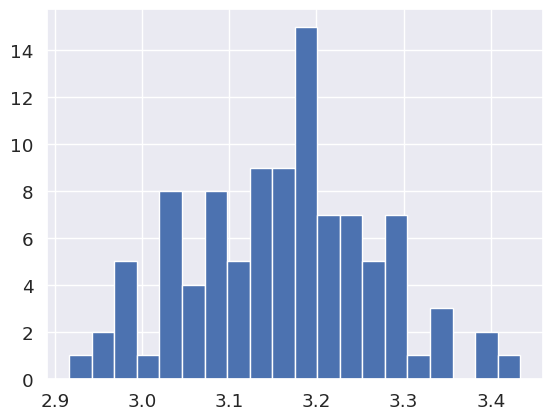

In [6]:
import ot

n = 500  # nb samples
mu_s = np.array([0, 0])
cov_s = np.array([[1, 0], [0, 1]])
mu_t = np.array([4, 2])
cov_t = np.array([[2., -.8], [-.8, 1]])
xs = ot.datasets.make_2D_samples_gauss(n, mu_s, cov_s)
xt = ot.datasets.make_2D_samples_gauss(n, mu_t, cov_t)
a, b = np.ones((n,)) / n, np.ones((n,)) / n  # uniform distribution on samples
seed = 50
n_projections = 100

swd_pot = [ot.sliced_wasserstein_distance(xs, xt, a, b, n_projections, seed=seed) for seed in range(100)]
plt.hist(swd_pot, bins=20)

In [7]:
import numpy as np


def random_projections(n_projections, dim, seed=None):
  """Generate random projection vectors.
  
  Args:
    n_projections: integer, number of projection vectors
    dim: integer, dimension of the ambient space
    seed: integer, random seed
  
  Returns:
    (n_projections, dim) array of projection vectors
  """
  np.random.seed(seed)
  theta = np.random.randn(n_projections, dim)
  theta = theta / np.linalg.norm(theta, axis=1, keepdims=True)
  return theta


def deterministic_projections(n_projections, dim, seed=None):
  """Generate random projection vectors.
  
  Args:
    n_projections: integer, number of projection vectors
    dim: integer, dimension of the ambient space
    seed: integer, random seed
  
  Returns:
    (n_projections, dim) array of projection vectors
  """
  assert dim == 2, "Only implemented for dim=2"
  angles = np.linspace(-np.pi, np.pi, n_projections)
  theta = np.array([np.cos(angles), np.sin(angles)]).T
  return theta, angles


def sliced_wasserstein_embeddings(point_cloud, projections, t):
  """Sliced Wasserstein features from projections.
  
  Args:
    point_cloud: WeightedPoint cloud of shape (n, dim)
    projections: (n_projections, dim) array of projection vectors
    t: integer, number of points used in integration of CDF.

  Returns:
    (n, n_projections * T) array of Sliced Wasserstein features
  """
  # shape (n, k), (n, 1)
  # point, weights = point_cloud.points, point_cloud.weights
  point, weights = point_cloud
  points = point @ projections.T  # shape (n, n_projections)
  cum_t = np.linspace(0, 1, t)  # shape (T,)
  weights = weights / np.sum(weights, axis=0, keepdims=True)  # re-normalize weights
  inv_cdf = []
  for proj in range(projections.shape[0]):
    points_slice = np.array(points[:, proj])  # shape (n,)
    points_idx = np.argsort(points_slice, axis=0, kind='mergesort')
    points_slice = np.take_along_axis(points_slice, points_idx, axis=0)  # sort points
    weights_slice = np.take_along_axis(weights, points_idx, axis=0)  # sort weights
    cum_cdf_slice = np.cumsum(weights_slice)  # shape (n,)
    inv_cdf_slice = np.interp(cum_t, cum_cdf_slice, points_slice)  # shape (T,)
    inv_cdf.append(inv_cdf_slice)
  inv_cdf = np.array(inv_cdf)  # shape (n_projections, T)
  return inv_cdf

In [8]:
n_projections = 25
# projections = random_projections(n_projections=n_projections, dim=2, seed=seed)
projections, angles = deterministic_projections(n_projections=n_projections, dim=2, seed=seed)
num_t = 100
swd_features_s = sliced_wasserstein_embeddings((xs, a), projections, num_t)
swd_features_t = sliced_wasserstein_embeddings((xt, b), projections, num_t)

In [9]:
swd_features = np.concatenate([swd_features_s, swd_features_t], axis=1).T
columns = [f'p{i}' for i in range(1,n_projections+1)]
df = pd.DataFrame(data=swd_features, columns=columns)
df['Distribution'] = ['Source'] * num_t + ['Target'] * num_t
df['t'] = np.linspace(0, 1, num_t).tolist() * 2
df = df.melt(id_vars=['Distribution', 't'], var_name='Projection', value_name='Pi#(t)')
df

,Distribution,t,Projection,Pi#(t)
0,Source,0.000000,p1,-3.808226
1,Source,0.010101,p1,-2.366437
2,Source,0.020202,p1,-2.149404
3,Source,0.030303,p1,-1.943002
4,Source,0.040404,p1,-1.730232
...,...,...,...,...
4995,Target,0.959596,p25,-1.631508
4996,Target,0.969697,p25,-1.306662
4997,Target,0.979798,p25,-1.085388
4998,Target,0.989899,p25,-0.767762


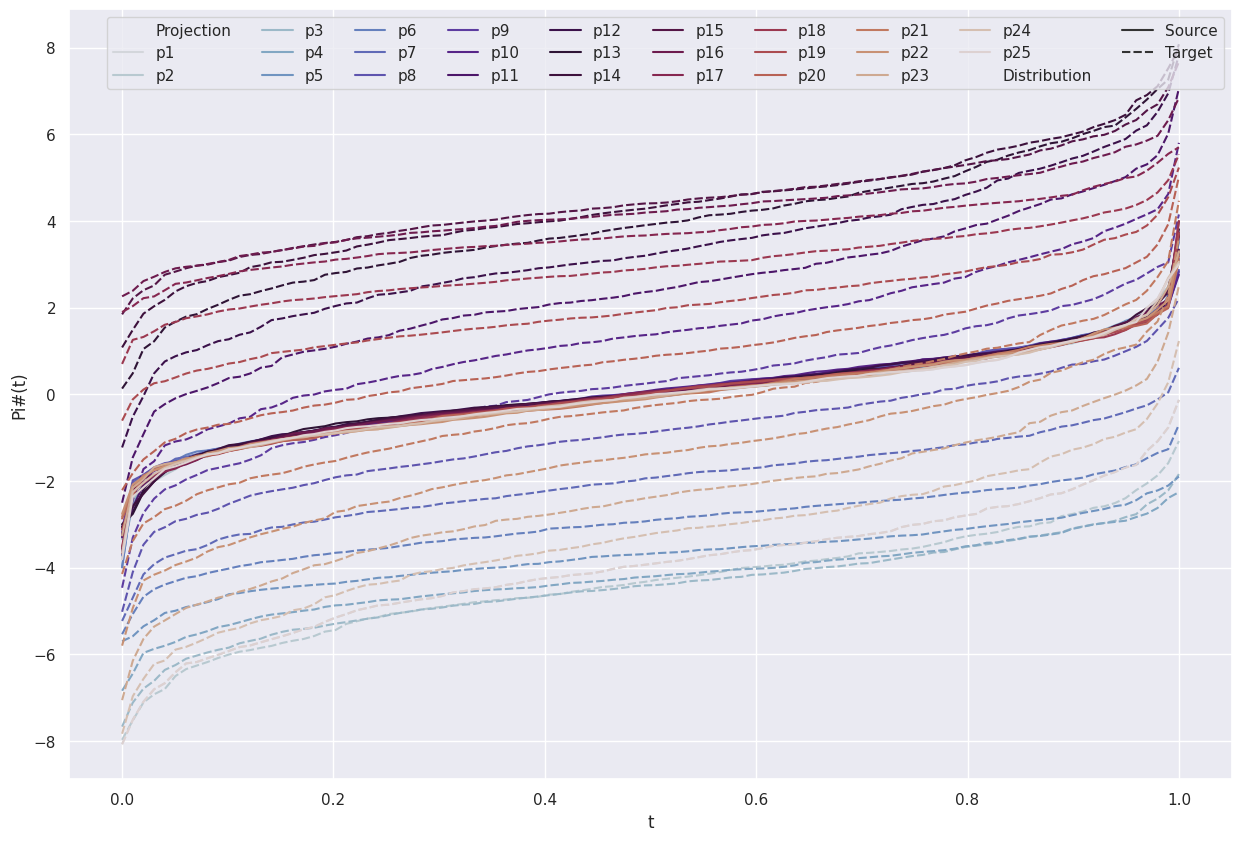

In [10]:
sns.set(context='paper')
sns.set(font_scale=1.0)
plt.figure(figsize=(15, 10))
ax = sns.lineplot(data=df, x='t', y='Pi#(t)', hue='Projection', style='Distribution', palette='twilight', legend='brief')
h,l = ax.get_legend_handles_labels()
ax.legend_.remove()
ax.legend(h,l, ncol=10)

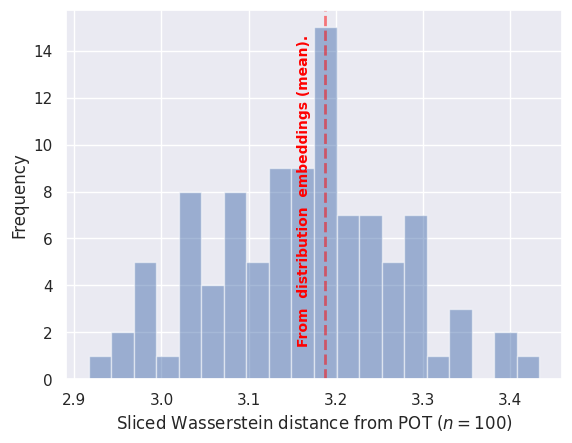

In [22]:
swd_mean = np.mean(np.square(swd_features_s - swd_features_t))**0.5
swd_features_s_rescaled = swd_features_s / (n_projections * num_t)**0.5
swd_features_t_rescaled = swd_features_t / (n_projections * num_t)**0.5
swd_rescaled = np.linalg.norm(swd_features_s_rescaled.flatten() - swd_features_t_rescaled.flatten())

plt.hist(swd_pot, bins=20, alpha=0.5, label='POT')
plt.axvline(x=swd_mean, color='red', linestyle='--', linewidth=2, alpha=0.5)
plt.text(swd_mean*0.99, 1.5, 'From  distribution  embeddings (mean).', rotation=90, color='red', fontsize=10, fontweight='bold')
# plt.axvline(x=swd_rescaled, color='green', linestyle='-.', linewidth=2, alpha=0.5)
# plt.text(swd_rescaled*1.005, 1.5, 'From  distribution  embeddings (rescaled).', rotation=90, color='green', fontsize=10, fontweight='bold')
plt.xlabel('Sliced Wasserstein distance from POT ($n=100$)')
plt.ylabel('Frequency')
plt.savefig('swd.png', dpi=300, bbox_inches='tight')